In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df = pd.read_excel("dataset-TA.xlsx")
df2 = pd.read_csv("dataset TA.csv")

In [3]:
df2['Tanggal'] = pd.to_datetime(df2['Tanggal'])
df2.set_index('Tanggal',inplace = True)

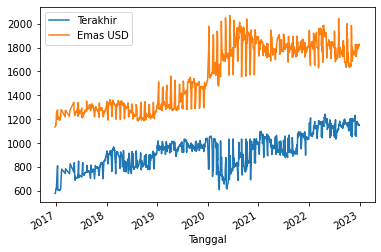

In [4]:
df2[['Terakhir','Emas USD']].plot()

In [17]:
df.set_index('Tanggal',inplace = True)

# Pre Process

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
X = df.iloc[:,1:]  #independent columns
y = df.iloc[:,0] 
y = label_encoder.fit_transform(y)

In [7]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

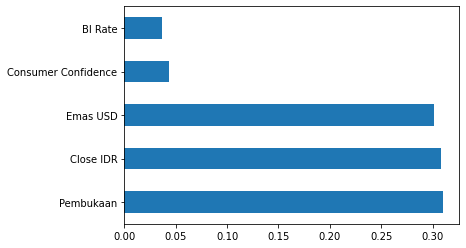

In [8]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

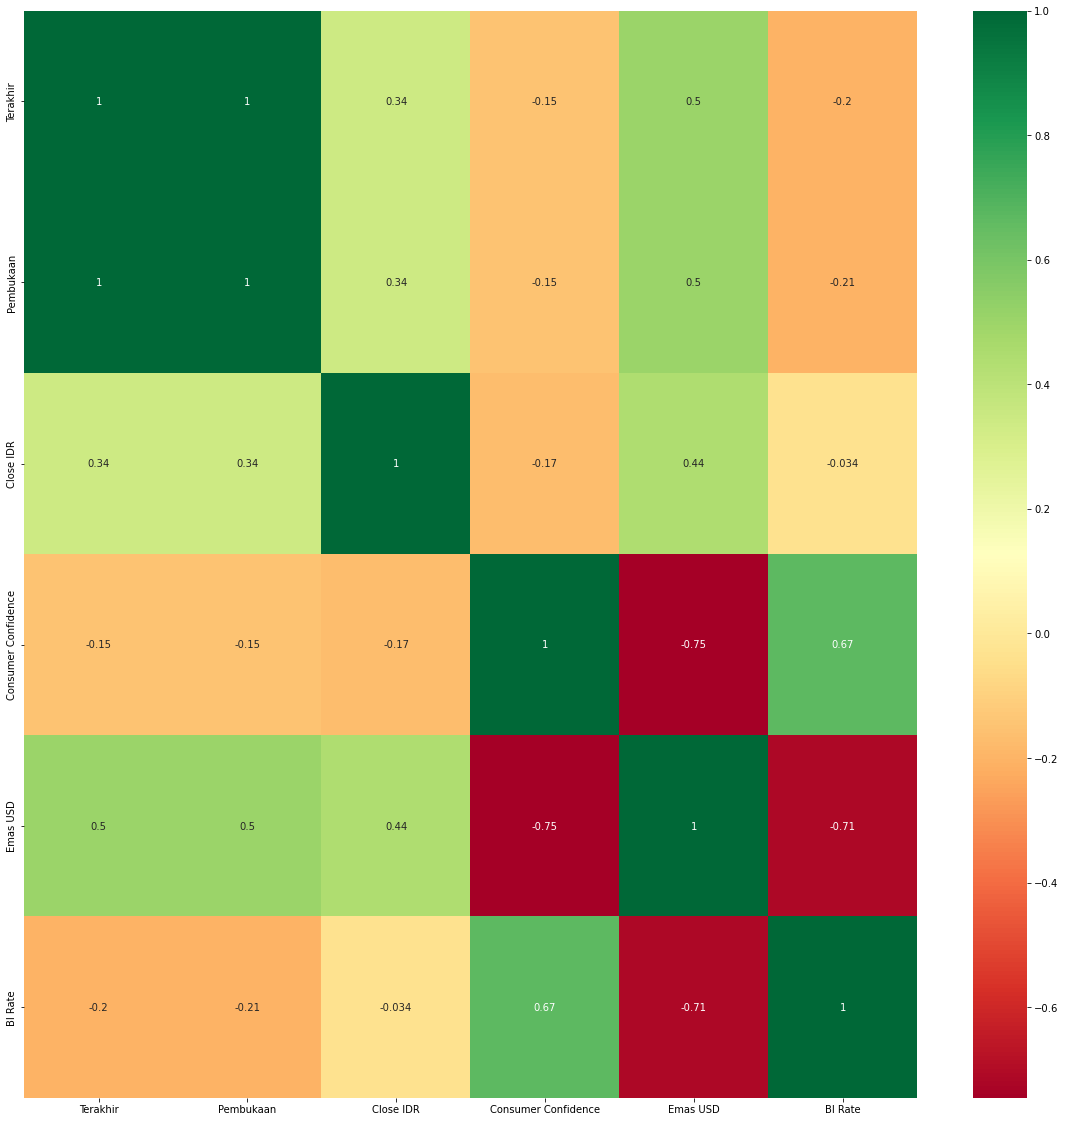

In [9]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
df1 = df[['Terakhir','Close IDR','Emas USD','BI Rate','Consumer Confidence']]

In [6]:
df1.shape

(1241, 5)

In [11]:
# sample = df.head(10)
# sample.to_csv('sample.csv',index = True)

In [44]:
# statistik = df.describe()
# statistik.to_excel('statistik.xlsx')

In [12]:
# df1 = df1[19:]

In [13]:
# df1.iloc[0:986]

,Terakhir,Close IDR,Emas USD,BI Rate,Consumer Confidence
Tanggal,,,,,
2017-01-30,616.38,13360.000000,1219.4,4.75,115.4
2017-01-31,627.67,13506.000000,1250.0,4.75,115.9
2017-02-02,626.74,13346.000000,1232.9,4.75,115.4
2017-02-03,698.60,13470.000000,1218.9,4.75,123.8
2017-02-06,701.16,13494.000000,1227.7,4.75,123.8
...,...,...,...,...,...
2021-11-25,1045.85,14320.000000,1786.9,3.50,104.4
2021-11-26,1052.61,14408.200195,1785.2,3.50,104.4
2021-11-29,1032.88,14377.000000,1776.5,3.50,104.4


In [14]:
from skimage.restoration import (denoise_wavelet, estimate_sigma)

df1['Terakhir']= denoise_wavelet(df1.iloc[:, 0], wavelet='haar',
                                      #method='BayesShrink', 
                                      method='VisuShrink',  
                                      mode='soft', rescale_sigma = True)
df1.head()

c:\Users\Dimas\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Terakhir,Close IDR,Emas USD,BI Rate,Consumer Confidence
Tanggal,,,,,
2016-12-23,613.13035,13449.0,1133.6,4.75,115.9
2016-12-27,613.13035,13442.0,1138.8,4.75,115.9
2016-12-28,613.13035,13429.0,1140.9,4.75,115.9
2016-12-29,613.13035,13490.0,1158.1,4.75,115.9
2016-12-30,613.13035,13466.0,1151.7,4.75,115.9


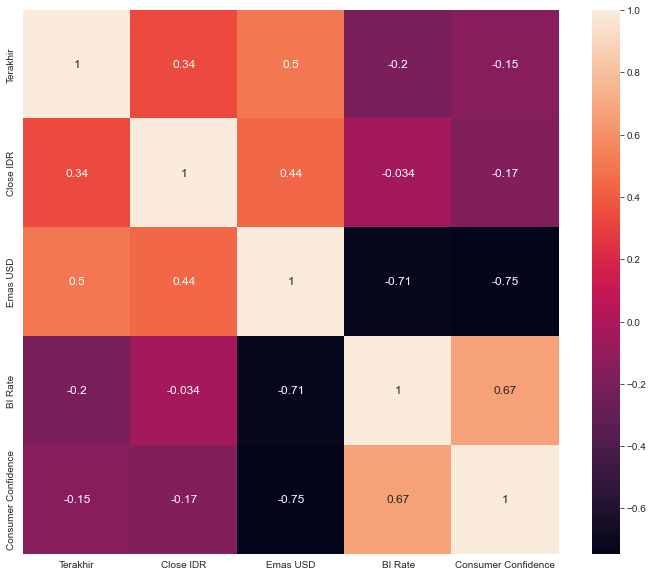

In [17]:
fig = plt.figure(figsize= (12,10))
sns.heatmap(df1.corr(), annot=True, annot_kws={"size": 12})
sns.set_style("whitegrid")
plt.savefig("correlationheatmap.png")

In [18]:
dates = df.index
dates = pd.to_datetime(dates)
#df1.index = dates

,Tanggal,Terakhir,Pembukaan,Close IDR,Consumer Confidence,Emas USD,BI Rate
0,2016-12-23,576.13,573.42,13449.000000,115.9,1133.6,4.75
1,2016-12-27,582.88,573.62,13442.000000,115.9,1138.8,4.75
2,2016-12-28,594.30,587.15,13429.000000,115.9,1140.9,4.75
3,2016-12-29,611.62,597.09,13490.000000,115.9,1158.1,4.75
4,2016-12-30,613.80,612.84,13466.000000,115.9,1151.7,4.75
...,...,...,...,...,...,...,...
1236,2022-12-26,1155.56,1148.94,15565.900391,113.1,1809.7,5.50
1237,2022-12-27,1150.40,1155.67,15607.000000,113.1,1823.1,5.50
1238,2022-12-28,1146.11,1150.40,15617.500000,113.1,1815.8,5.50
1239,2022-12-29,1146.98,1146.22,15789.000000,113.1,1826.0,5.50


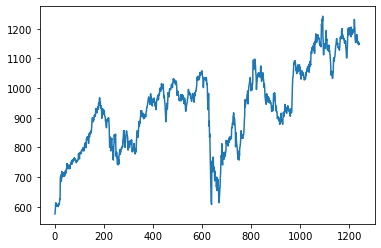

In [10]:
df1['Terakhir'].plot()

In [19]:
dates

DatetimeIndex(['2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-02', '2017-01-03', '2017-01-11',
               '2017-01-13', '2017-01-16',
               ...
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Tanggal', length=1241, freq=None)

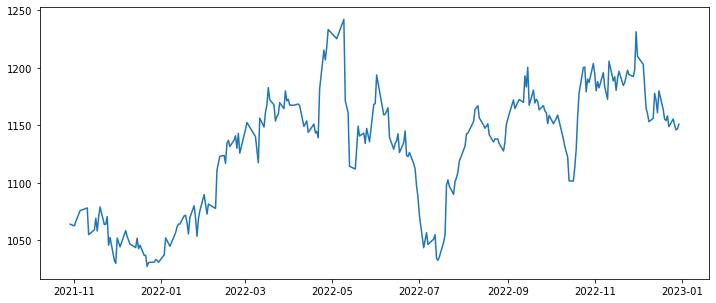

In [24]:

plt.figure(figsize=(12, 5))
plt.plot(dates[986:],df1.iloc[986:,0])
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()


# Transform your data using the scaler
#normalized_data = scaler.transform(your_data)

In [12]:
# Fit the scaler to your data
scaler.fit(df1)

# Transform your data using the scaler
normalized_data = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
normalized_price = scaler1.fit_transform(np.array(df1['Terakhir']).reshape(-1,1))

In [13]:
normalized_data

,Terakhir,Close IDR,Emas USD,BI Rate,Consumer Confidence
0,0.000000,0.076184,0.000000,0.5,0.75835
1,0.010134,0.074067,0.005557,0.5,0.75835
2,0.027280,0.070137,0.007801,0.5,0.75835
3,0.053283,0.088578,0.026181,0.5,0.75835
4,0.056556,0.081323,0.019342,0.5,0.75835
...,...,...,...,...,...
1236,0.869937,0.716156,0.722483,0.8,0.70334
1237,0.862190,0.728581,0.736803,0.8,0.70334
1238,0.855749,0.731755,0.729002,0.8,0.70334
1239,0.857055,0.783602,0.739902,0.8,0.70334


In [14]:
def createdataset(dataset,timestep ) :
    DataX = []
    DataY = []

    for i in range(len(dataset)- timestep -1):
            a = dataset.iloc[i:(i+ timestep),]
            DataX.append(a)
            b = dataset.iloc[i + timestep, 0]
            DataY.append(b) #ydata consists close price
    
    return np.array(DataX), np.array(DataY)

def data_split(data, split = 0.2):
  #======= creating training and test data===#
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  data1  = data.iloc[0:l1,:]
  data2   = data.iloc[l1:len(data),:]
  return data1, data2


In [15]:
# training_size = int(len(df)*0.8)
# test_size = len(df) - training_size
# train_data,test_data = normalized_data[0:training_size],normalized_data[training_size:len(normalized_data)]
# train_dates,tes_dates = dates[0:training_size],dates[training_size:len(normalized_data)]

train_data,test_data = data_split(normalized_data,split = 0.0)
# train_data,val_data = data_split(train_data,split = 0.2)

In [16]:
train_data.shape,test_data.shape

((1241, 5), (0, 5))

In [17]:
train_data.shape,test_data.shape,val_data.shape

NameError: name 'val_data' is not defined

In [18]:
timestep = 5
X_train,y_train = createdataset(train_data,timestep)
X_test, y_test = createdataset(test_data,timestep)
# X_val, y_val = createdataset(val_data,timestep)

In [19]:
X_train.shape,y_train.shape

((1235, 5, 5), (1235,))

In [27]:
normalized_sample = normalized_data.head(10)
normalized_sample.to_excel("normalized_sample.xlsx")

In [26]:
X_train

array([[[0.        , 0.07618355, 0.        , 0.5       , 0.75834971],
        [0.01013422, 0.07406734, 0.00555674, 0.5       , 0.75834971],
        [0.02727982, 0.07013723, 0.00780081, 0.5       , 0.75834971],
        [0.05328349, 0.08857849, 0.02618081, 0.5       , 0.75834971],
        [0.05655647, 0.08132291, 0.01934174, 0.5       , 0.75834971]],

       [[0.01013422, 0.07406734, 0.00555674, 0.5       , 0.75834971],
        [0.02727982, 0.07013723, 0.00780081, 0.5       , 0.75834971],
        [0.05328349, 0.08857849, 0.02618081, 0.5       , 0.75834971],
        [0.05655647, 0.08132291, 0.01934174, 0.5       , 0.75834971],
        [0.0445005 , 0.01844126, 0.06689464, 0.5       , 0.74852652]],

       [[0.02727982, 0.07013723, 0.00780081, 0.5       , 0.75834971],
        [0.05328349, 0.08857849, 0.02618081, 0.5       , 0.75834971],
        [0.05655647, 0.08132291, 0.01934174, 0.5       , 0.75834971],
        [0.0445005 , 0.01844126, 0.06689464, 0.5       , 0.74852652],
        [0.03835

In [23]:
y_train.reshape(-1,1)

array([[0.0445005 ],
       [0.03835991],
       [0.04047683],
       ...,
       [0.86218959],
       [0.85574873],
       [0.85705492]])

In [17]:
normalized_data['Terakhir']

0       0.000000
1       0.010134
2       0.027280
3       0.053283
4       0.056556
          ...   
1236    0.869937
1237    0.862190
1238    0.855749
1239    0.857055
1240    0.863060
Name: Terakhir, Length: 1241, dtype: float64

In [18]:
y_train

array([0.0445005 , 0.03835991, 0.04047683, ..., 0.86218959, 0.85574873,
       0.85705492])

In [19]:
X_test.shape,y_test.shape

((0,), (0,))

In [20]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split


In [22]:
# Build the LSTM model
#timestep = 2
batch_size = 16
lr = 0.01
optimizer = Adam(lr=lr)
model = Sequential()
model.add(LSTM(30,activation='relu' ,input_shape=(timestep, X_train.shape[2])))
# model.add(LSTM(150,activation='relu' ,batch_input_shape= (batch_size, timestep, X_train.shape[2]),stateful = True))
#model.add(LSTM(100))
# model.add(LSTM(30, return_sequences=True))
# model.add(LSTM(30, return_sequences= True))
# model.add(LSTM(30))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= optimizer)



Instructions for updating:
Use tf.cast instead.


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30)                4320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1235/1235 [==============================] - 3s 2ms/sample - loss: 0.0242
Epoch 2/50
1235/1235 [==============================] - 1s 592us/sample - loss: 0.0022
Epoch 3/50
1235/1235 [==============================] - 1s 545us/sample - loss: 0.0012
Epoch 4/50
1235/1235 [==============================] - 1s 524us/sample - loss: 0.0012
Epoch 5/50
1235/1235 [==============================] - 1s 540us/sample - loss: 0.0012
Epoch 6/50
1235/1235 [==============================] - 1s 600us/sample - loss: 9.9730e-04
Epoch 7/50
1235/1235 [==============================] - 1s 653us/sample - loss: 0.0011
Epoch 8/50
1235/1235 [==============================] - 1s 534us/sample - loss: 8.8912e-04
Epoch 9/50
1235/1235 [==============================] - 1s 537us/sample - loss: 8.7093e-04
Epoch 10/50
1235/1235 [==============================] - 1s 537us/sample - loss: 8.6504e-04
Epoch 11/50
1235/1235 [==============================] - 1s 633us/s

KeyError: 'val_loss'

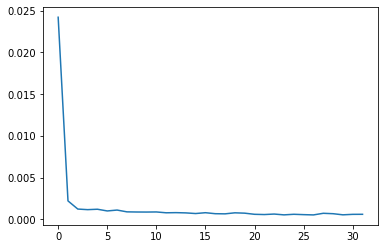

In [25]:
# Define the EarlyStopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

# Train the model

#history = model.fit(X_train, y_train,validation_data=(X_test,y_test) ,epochs=50,batch_size=8,callbacks=[early_stop])
history = model.fit(X_train, y_train ,epochs=50,batch_size=16,callbacks=[early_stop])
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [3]:
#extrapolate 2023
df2023 = pd.read_excel("dataset-extrapolation2023.xlsx")

In [4]:
df_2023 = df2023[['Terakhir','Close IDR','Emas USD','BI Rate','Consumer Confidence']]

In [8]:
sample2023 = df2023.head(5)

sample2023.to_csv("sample2023.csv")

In [37]:
# Create the scaler object
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()


# Fit the scaler to your data
scaler2.fit(df_2023)

# Transform your data using the scaler
normalized_data2023 = pd.DataFrame(scaler2.fit_transform(df_2023), columns=df1.columns)
normalized_price2023 = scaler3.fit_transform(np.array(df_2023['Terakhir']).reshape(-1,1))

In [39]:
# test_data2023 = data_split(normalized_data2023,split = 0.0)

In [51]:
train_data2023,test_data2023 = data_split(normalized_data2023,split = 0.0)

In [54]:
timestep = 5
X_train2023,y_train2023 = createdataset(train_data2023,timestep)
X_test2023, y_test2023 = createdataset(test_data2023,timestep)

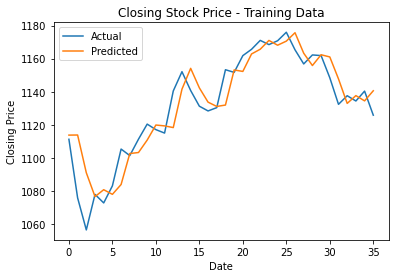

In [60]:
train_pred2023 = model.predict(X_train2023)
train_pred2023 = scaler3.inverse_transform(train_pred2023)
train_actual2023 = scaler3.inverse_transform(y_train2023.reshape(-1,1))

# test_pred = model.predict(X_test)
# test_pred = scaler1.inverse_transform(test_pred)
# test_actual = scaler1.inverse_transform(y_test)

#Plot the true closing price together with its predictions on the training data
plt.plot(train_actual2023, label='Actual')
plt.plot(train_pred2023, label='Predicted')
plt.title('Closing Stock Price - Training Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [68]:
normalized_data2023

,Terakhir,Close IDR,Emas USD,BI Rate,Consumer Confidence
0,0.762048,0.920530,0.092257,0.0,1.000000
1,0.772693,0.953642,0.205429,0.0,1.000000
2,0.676222,0.940397,0.310006,0.0,1.000000
3,0.484201,0.966887,0.160304,0.0,1.000000
4,0.452854,1.000000,0.393238,0.0,1.000000
5,0.458470,0.913907,0.435356,0.0,1.000000
6,0.162183,0.920530,0.476040,0.0,0.007742
7,0.000000,0.801325,0.469665,0.0,0.007742
8,0.179784,0.610596,0.616360,0.0,0.007742
9,0.136535,0.350993,0.783611,0.0,0.007742


In [78]:
tanggal = df2023['Tanggal'].copy()

In [87]:
tanggal = tanggal[5:41]

In [92]:
tanggal = tanggal.reset_index()

In [95]:
tanggal.drop("index",axis=1,inplace=True)

In [99]:
train_pred2023.shape,train_actual2023.shape

((36, 1), (36, 1))

array([[1113.8503],
       [1113.9148],
       [1091.1407],
       [1076.7391],
       [1080.8995],
       [1078.0969],
       [1084.041 ],
       [1102.7361],
       [1103.3456],
       [1110.8542],
       [1119.939 ],
       [1119.4144],
       [1118.3995],
       [1141.5891],
       [1154.1473],
       [1142.3604],
       [1133.7449],
       [1131.1509],
       [1131.9962],
       [1153.1902],
       [1152.2896],
       [1162.8246],
       [1165.6954],
       [1170.9965],
       [1168.1047],
       [1170.5773],
       [1175.6552],
       [1163.2783],
       [1155.8447],
       [1162.3566],
       [1161.0348],
       [1147.7701],
       [1132.9915],
       [1137.6968],
       [1134.5204],
       [1140.6163]], dtype=float32)

In [113]:
df_extrapolate2023 = pd.DataFrame({'Harga Aktual': train_actual2023.flatten(), 'Harga Prediksi': train_pred2023.flatten()})

In [115]:
df_extrapolate2023['Tanggal'] = tanggal

In [122]:
df_extrapolate2023 = df_extrapolate2023.set_index('Tanggal')
df_extrapolate2023.to_csv('closeprice predicted-actual 2023',index=False)

KeyError: "None of ['Tanggal'] are in the columns"

In [28]:
from sklearn.metrics import mean_squared_error

rmse_tes = mean_squared_error(train_actual2023, train_pred2023,squared=False)
rmse_tes

NameError: name 'train_actual2023' is not defined

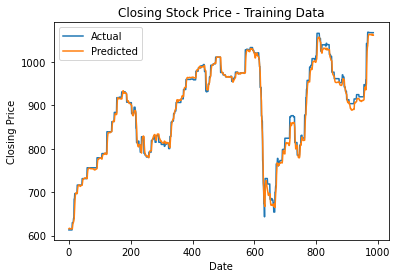

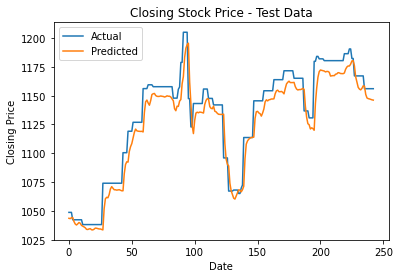

In [174]:
train_pred = model.predict(X_train)
train_pred = scaler1.inverse_transform(train_pred)
train_actual = scaler1.inverse_transform(y_train)

test_pred = model.predict(X_test)
test_pred = scaler1.inverse_transform(test_pred)
test_actual = scaler1.inverse_transform(y_test)

#Plot the true closing price together with its predictions on the training data
plt.plot(train_actual, label='Actual')
plt.plot(train_pred, label='Predicted')
plt.title('Closing Stock Price - Training Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# #Plot the true closing price together with its predictions on the test data
plt.plot(test_actual, label='Actual')
plt.plot(test_pred, label='Predicted')
plt.title('Closing Stock Price - Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [175]:
from sklearn.metrics import r2_score

# Assuming you have the actual stock prices in 'actual_prices' and predicted stock prices in 'predicted_prices'

r2 = r2_score(test_actual, test_pred)
Adj_r2 = 1 - (1-r2_score(test_actual, test_pred)) * (len(test_actual)-1)/(len(test_actual)-X_train.shape[2]-1)
print("R^2: {}".format(r2))
print("R^2 adj: {}".format(Adj_r2))

R^2: 0.9188636143323293
R^2 adj: 0.9171518762380747


In [176]:
from sklearn.metrics import mean_squared_error

rmse_tes = mean_squared_error(test_actual, test_pred,squared=False)
rmse_tes

13.212732396144904

In [177]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_actual, test_pred)

mae


10.334211032432579

In [180]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test_actual,test_pred)
mape

0.009046943527028665

In [178]:
R = np.corrcoef(test_actual, test_pred ,rowvar=False )
#test_actual.shape,test_pred.shape
R[0:1]

array([[1.       , 0.9767814]])

In [33]:
import matplotlib.dates as mdates

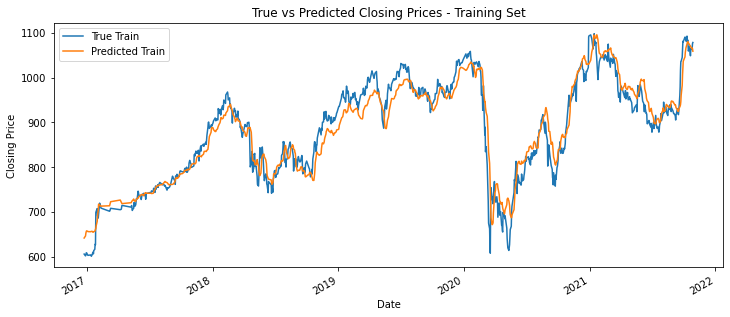

In [135]:
# Plot the true and predicted closing prices on the training set
plt.figure(figsize=(12, 5))
plt.plot(dates[0:986].sort_values(), train_actual, label='True Train')
plt.plot(dates[0:986].sort_values(), train_pred, label='Predicted Train')


# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()

# Set the x-axis ticker locator to show ticks for years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())



# Rotate the tick labels for better visibility
plt.gcf().autofmt_xdate()



plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('True vs Predicted Closing Prices - Training Set')

plt.legend()
#plt.savefig('True vs Predicted Closing Prices - Training Set (150 Neuron).png')
plt.show()

In [126]:
# Plot the true and predicted closing prices on the training set
plt.figure(figsize=(12, 5))
plt.plot(dates[986:1229].sort_values(), test_actual, label='True Test')
plt.plot(dates[986:1229].sort_values(), test_pred, label='Predicted Test')


# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()


# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis_date()

# Set the x-axis ticker locator to show ticks for years
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())



# Rotate the tick labels for better visibility
plt.gcf().autofmt_xdate()



plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('True vs Predicted Closing Prices - Training Set')

plt.legend()
#plt.savefig('True vs Predicted Closing Prices - Training Set (150 Neuron).png')
plt.show()

NameError: name 'test_actual' is not defined

<Figure size 864x360 with 0 Axes>

In [39]:
test_actual.shape

(243, 1)

# Predcting Future Values

In [113]:
n_future = 175
forecast_period_dates = pd.date_range(list(dates)[-1],periods=n_future,freq='1d')

In [114]:
forecast = model.predict(X_test[-n_future:])

In [115]:
forecast_copies = np.repeat(forecast,df1.shape[1],axis=-1)
y_pred_future = scaler1.inverse_transform(forecast_copies)[:,0]

In [116]:
df_forecast = pd.DataFrame({'Tanggal':np.array(forecast_period_dates), 'Close':y_pred_future})
df_forecast['Tanggal']=pd.to_datetime(df_forecast['Tanggal'])


# original = df1['Terakhir']
# original['Tanggal']=pd.to_datetime(original['Tanggal'])
# original = original.loc[original['Tanggal'] >= '2022-12-30']

# sns.lineplot(original['Tanggal'], original['Close'])
# sns.lineplot(df_forecast['Tanggal'], df_forecast['Close'])

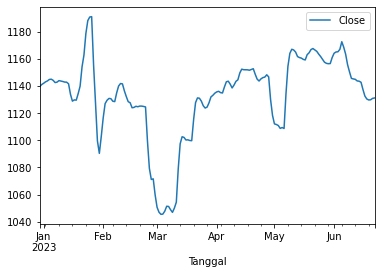

In [117]:
df_forecast.set_index('Tanggal').plot()

In [125]:
X_test[-n_future:]

array([[[0.91734035, 0.51185054, 0.97210943, 0.        , 0.5324165 ],
        [0.91734035, 0.61188691, 0.9262663 , 0.        , 0.5324165 ],
        [0.92293581, 0.75548685, 0.90980979, 0.        , 0.5324165 ],
        ...,
        [0.92293581, 0.34781418, 0.85071596, 0.        , 0.5324165 ],
        [0.92293581, 0.33505639, 0.82880957, 0.        , 0.5324165 ],
        [0.92013808, 0.32241966, 0.86514212, 0.        , 0.5324165 ]],

       [[0.91734035, 0.61188691, 0.9262663 , 0.        , 0.5324165 ],
        [0.92293581, 0.75548685, 0.90980979, 0.        , 0.5324165 ],
        [0.92293581, 0.34116323, 0.88394956, 0.        , 0.5324165 ],
        ...,
        [0.92293581, 0.33505639, 0.82880957, 0.        , 0.5324165 ],
        [0.92013808, 0.32241966, 0.86514212, 0.        , 0.5324165 ],
        [0.92013808, 0.34131439, 0.85028852, 0.        , 0.5324165 ]],

       [[0.92293581, 0.75548685, 0.90980979, 0.        , 0.5324165 ],
        [0.92293581, 0.34116323, 0.88394956, 0.        , 0.5

In [136]:
X_test[-1:]

array([[[0.91720905, 0.71663929, 0.73926053, 0.8       , 0.70333988],
        [0.91720905, 0.71316266, 0.73926053, 0.8       , 0.70333988],
        [0.91720905, 0.70016309, 0.70709553, 0.8       , 0.70333988],
        [0.91720905, 0.71527887, 0.71660611, 0.8       , 0.70333988],
        [0.91720905, 0.7161557 , 0.72248344, 0.8       , 0.70333988],
        [0.91720905, 0.72858076, 0.73680274, 0.8       , 0.70333988],
        [0.91720905, 0.73175507, 0.72900192, 0.8       , 0.70333988]]])

In [138]:
forecast_period_dates

DatetimeIndex(['2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
               '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-07', '2023-01-08',
               ...
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-17', '2023-06-18', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-22'],
              dtype='datetime64[ns]', length=175, freq='D')

In [137]:
X_test.shape

(241, 7, 5)

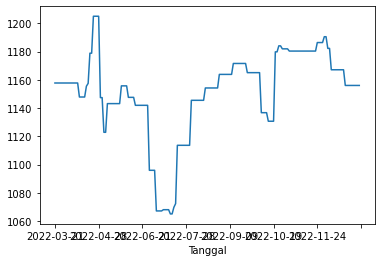

In [144]:
df1['Terakhir'][1066:].plot()

In [143]:
df1.shape

(1241, 5)

In [145]:
df1['Terakhir'][-175:]

Tanggal
2022-03-21    1157.802881
2022-03-22    1157.802881
2022-03-23    1157.802881
2022-03-24    1157.802881
2022-03-25    1157.802881
                 ...     
2022-12-26    1156.069055
2022-12-27    1156.069055
2022-12-28    1156.069055
2022-12-29    1156.069055
2022-12-30    1156.069055
Name: Terakhir, Length: 175, dtype: float64

In [148]:
forecast.shape

(175, 1)

In [182]:
forecast_copies.shape

(175, 5)

In [154]:
y_pred_future

array([1139.4675, 1140.983 , 1141.8932, 1142.9604, 1143.6613, 1144.7408,
       1144.9626, 1144.1036, 1142.4598, 1142.7715, 1143.9097, 1143.628 ,
       1143.2706, 1142.8296, 1142.7544, 1141.5435, 1133.7937, 1128.8003,
       1129.7114, 1129.5309, 1134.344 , 1139.8407, 1153.9722, 1162.7383,
       1178.6025, 1188.1064, 1190.7084, 1191.0072, 1155.5262, 1127.5604,
       1099.5253, 1090.3326, 1102.8541, 1116.4808, 1126.9677, 1129.4338,
       1130.7855, 1130.6029, 1128.7273, 1128.4554, 1134.87  , 1139.9047,
       1141.7535, 1141.509 , 1136.4016, 1132.1652, 1128.3925, 1127.6292,
       1123.9319, 1124.1685, 1124.9989, 1124.6692, 1125.1477, 1125.1418,
       1124.8833, 1124.5189, 1099.4839, 1079.2953, 1071.1198, 1071.5769,
       1059.677 , 1050.6384, 1047.0095, 1045.4603, 1045.6129, 1047.7726,
       1051.4025, 1051.2384, 1048.8661, 1046.8917, 1050.057 , 1054.372 ,
       1078.9595, 1097.3425, 1102.5715, 1102.0942, 1100.1901, 1100.3082,
       1099.8124, 1099.6708, 1115.3212, 1127.7056, 

In [184]:
X_test[-1]

array([[0.91720905, 0.70016309, 0.70709553, 0.8       , 0.70333988],
       [0.91720905, 0.71527887, 0.71660611, 0.8       , 0.70333988],
       [0.91720905, 0.7161557 , 0.72248344, 0.8       , 0.70333988],
       [0.91720905, 0.72858076, 0.73680274, 0.8       , 0.70333988],
       [0.91720905, 0.73175507, 0.72900192, 0.8       , 0.70333988]])

In [185]:
y_test[-1]

array([0.91720905])

In [206]:
test_actual.std()

46.38577428087806